In [1]:
# importing libreries
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

main= pd.read_excel("gdrive/My Drive/mL/SPI1.xlsx")
print(main.shape)

# read the excel file
df = main
df.head()


Mounted at /content/gdrive
Mounted at /content/gdrive
(14610, 3)


,date,rain,SPI1
0,1981-01-01,0,1.652724
1,1981-01-02,0,1.652724
2,1981-01-03,0,1.652724
3,1981-01-04,0,1.652724
4,1981-01-05,0,1.652724


In [3]:
print(df.describe())

               rain          SPI1
count  14610.000000  14610.000000
mean       4.673443      0.943213
std       14.084072      0.731383
min        0.000000     -0.469504
25%        0.000000      0.370124
50%        0.000000      1.012941
75%        2.000000      1.534121
max      347.000000      4.946485


In [4]:
# Sort the Date
df1 = df.sort_values('date')
#print the sorted values
print(df.head(100))
#check any missing values
df.isnull().sum()

         date  rain      SPI1
0  1981-01-01     0  1.652724
1  1981-01-02     0  1.652724
2  1981-01-03     0  1.652724
3  1981-01-04     0  1.652724
4  1981-01-05     0  1.652724
..        ...   ...       ...
95 1981-04-06     0  0.890247
96 1981-04-07     0  0.890247
97 1981-04-08     0  0.890247
98 1981-04-09     0  0.890247
99 1981-04-10     0  0.890247

[100 rows x 3 columns]


date    0
rain    0
SPI1    0
dtype: int64

In [5]:
dfs = df.set_index('date')
dfs.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=14610, freq=None)

In [6]:
# grouping values according to date
df.groupby('date')['SPI1'].sum().reset_index()

# min and max values of date
print(df['date'].min())
print(df['date'].max())

1981-01-01 00:00:00
2020-12-31 00:00:00


In [7]:
# average the daily SPI 1 value for each month
# use start of each month as the timestamp
y = dfs['SPI1'].resample('MS').mean()
y['2000':]

date
2000-01-01    1.655652
2000-02-01    1.425612
2000-03-01    1.183094
2000-04-01    1.004357
2000-05-01    0.599046
                ...   
2020-08-01    0.380724
2020-09-01    0.365733
2020-10-01    1.048555
2020-11-01    1.539590
2020-12-01    1.907533
Freq: MS, Name: SPI1, Length: 252, dtype: float64

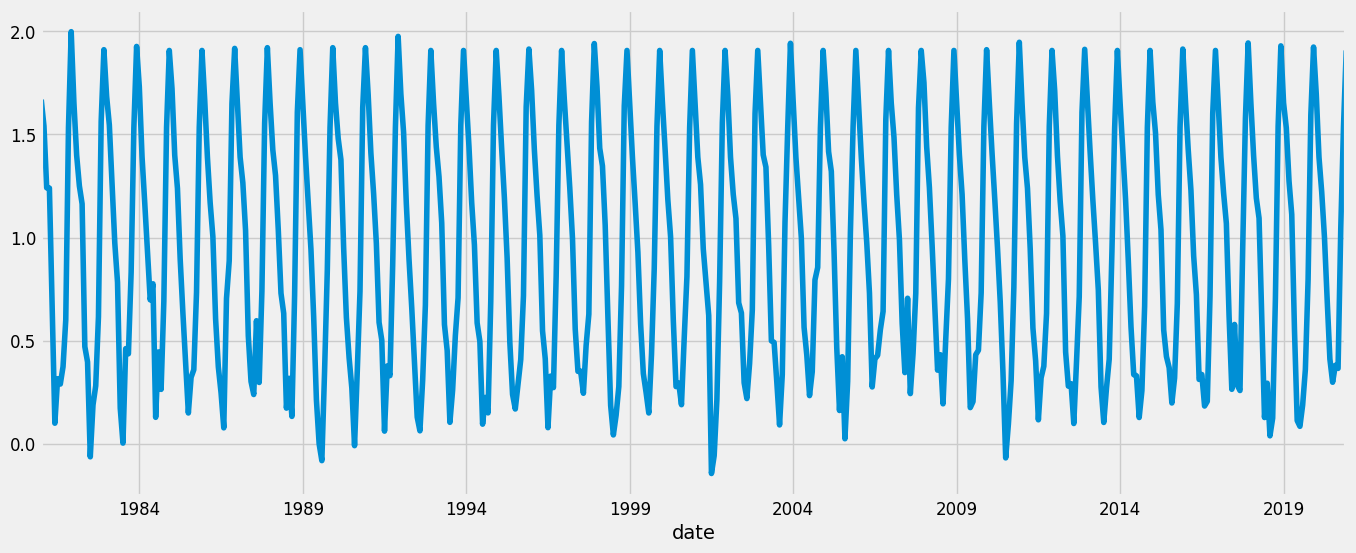

In [8]:
y.plot(figsize = (15, 6))
plt.show()

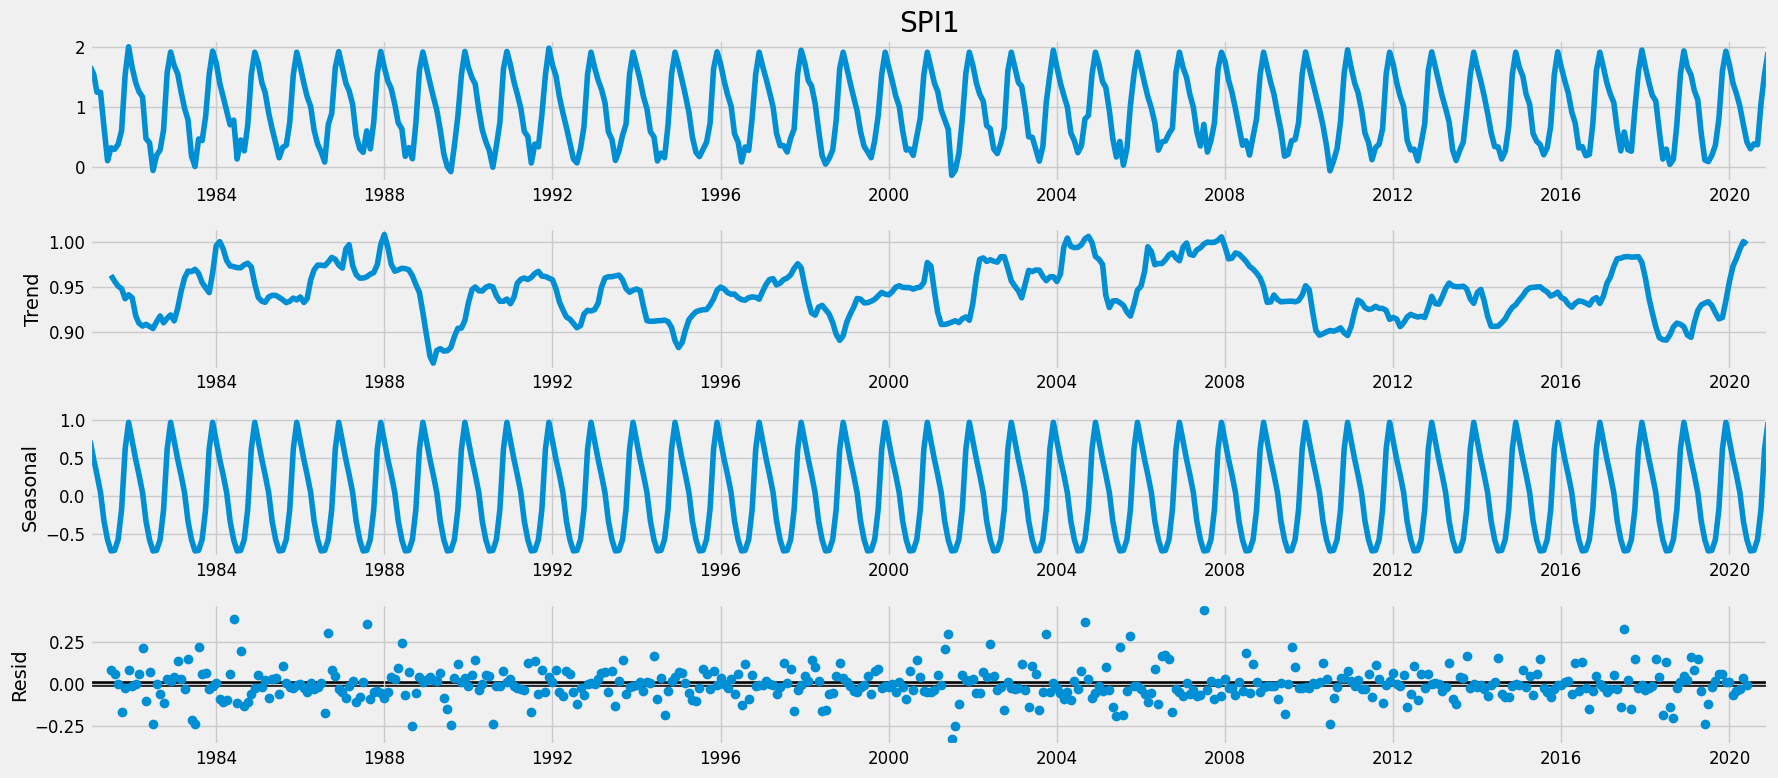

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y)
fig = decomposition.plot()
plt.show()

In [10]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False)
            result = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1468.0996273390483
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:929.2545793819044
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-492.15825721470503
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-755.4593620115883
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-454.8623991237148
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-710.4492810369001
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-642.9196247004824
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-753.5908257882168
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:929.6304377184395
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:544.944038782942
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-492.5971596070842
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-755.5782096517889
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-457.42788502465885
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-714.5448868827157
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-644.3465590133931
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-753.7857204790956
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:403.1538524432233
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:136.8625308420

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-361.0157858975334
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:-462.33925429186735
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:269.50170028829757
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:108.06139545596733
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-481.9713440507172
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:-740.5008021028654


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-471.88298069503287


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-724.3811654721937
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-631.5907566770836
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:-738.660957304673
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:396.4827496347142
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:124.30642186834851


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:-492.6561374479165
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:-755.606358870798
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-457.8291528317984
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:-718.0209563361175
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-644.7225912784659
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:-753.8150068404609
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:254.83093577913303
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:89.38425348069629
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-490.6649286470218
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:-753.609117938157


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-456.1572803156985


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:-708.9169956221401
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:-643.1774135819903
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:-751.8175484412218
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:255.24426430649353
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:101.65796085839798
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:-314.67210199831266
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:-575.4414814530154
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-311.90240690927845
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-557.8250976271202
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:-481.8525242265049
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:-573.8730602835415
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:249.67839104115524
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:103.6316255544096
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-482.6148820045054
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:-740.8489837920852
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-475.18490728118434
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:-715.5093521013439
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:-633.5642

In [12]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[0])


                                      SARIMAX Results                                      
Dep. Variable:                                SPI1   No. Observations:                  480
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                 320.781
Date:                             Sat, 22 Jul 2023   AIC                           -633.561
Time:                                     20:02:35   BIC                           -616.976
Sample:                                 01-01-1981   HQIC                          -627.035
                                      - 12-01-2020                                         
Covariance Type:                               opg                                         


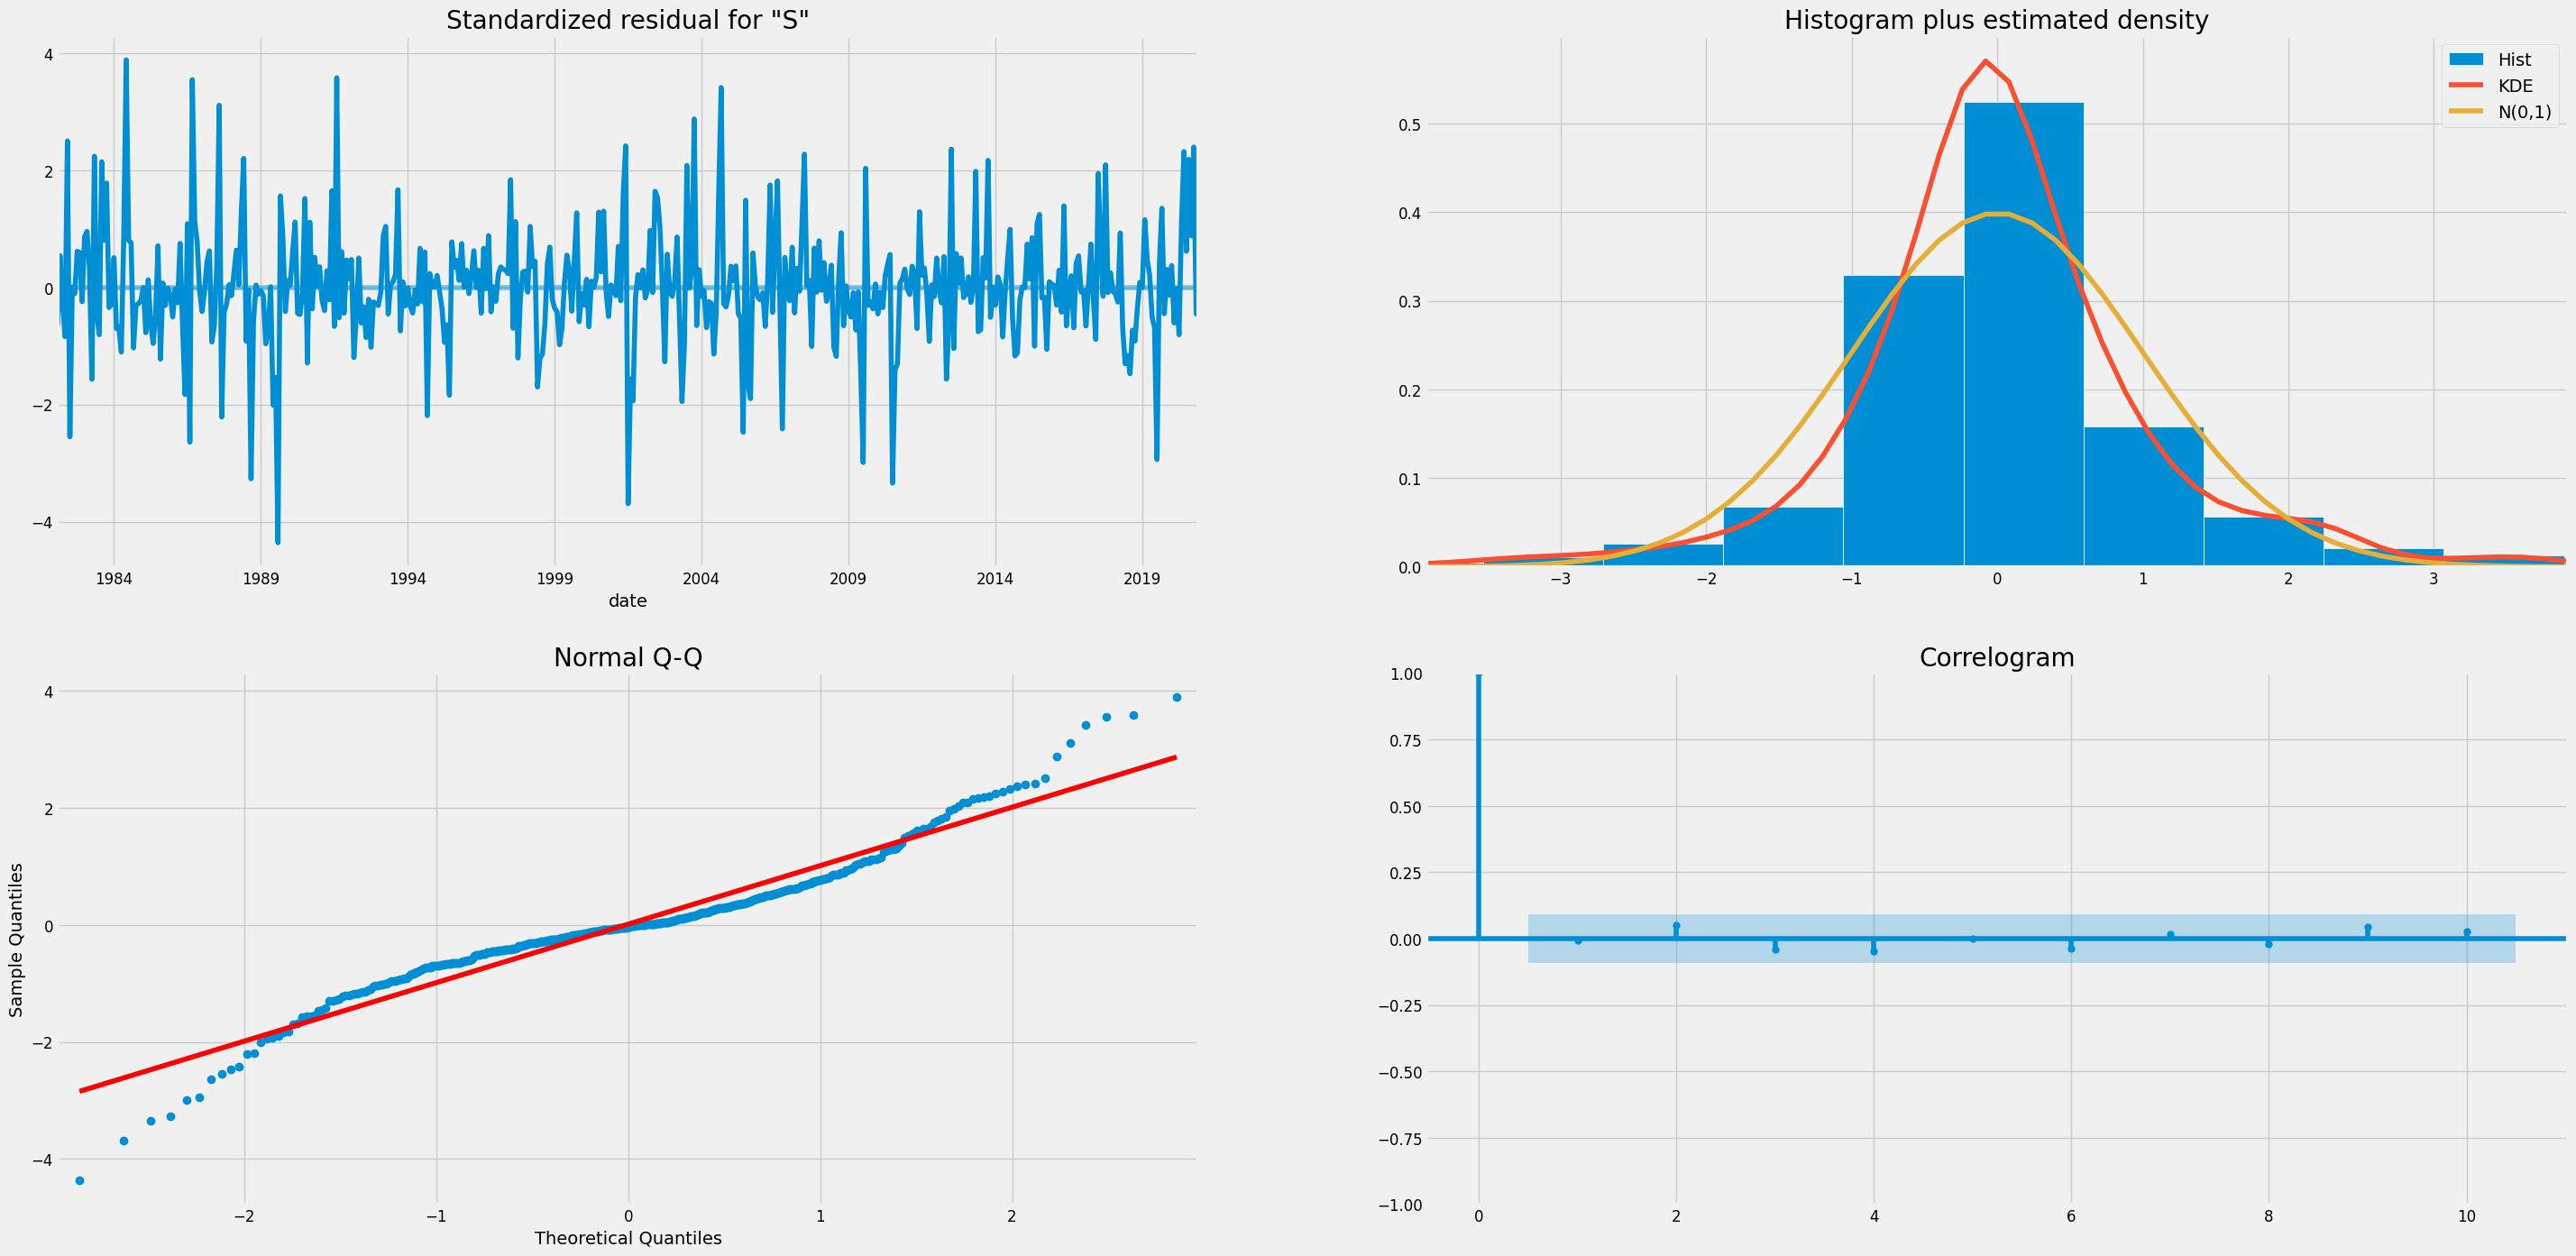

In [13]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (32, 16))
plt.show()

In [14]:
prediction = result.get_prediction(start = pd.to_datetime('2015-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower SPI1,upper SPI1
date,,
2015-01-01,1.421843,1.894012
2015-02-01,1.180840,1.653008
2015-03-01,0.954909,1.427075
2015-04-01,0.699712,1.171877
2015-05-01,0.436407,0.908571
...,...,...
2020-08-01,-0.119404,0.352677
2020-09-01,0.023003,0.495082
2020-10-01,0.523156,0.995234


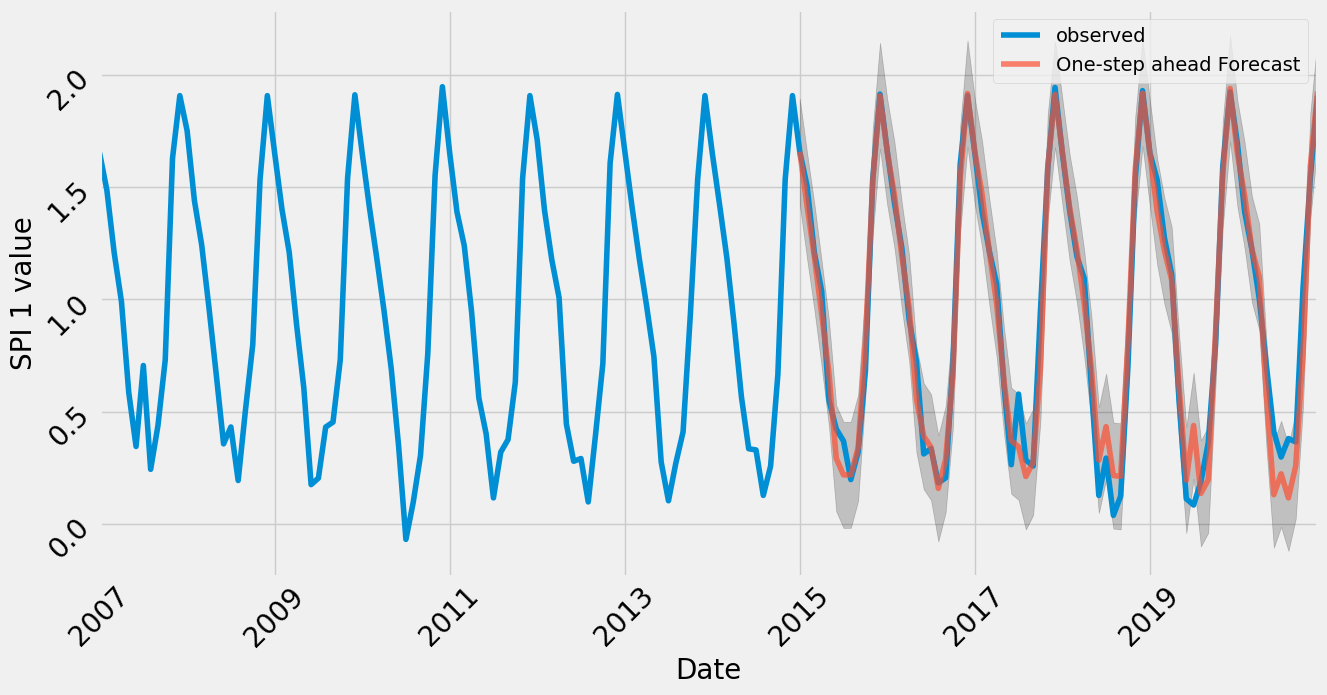

In [15]:
#Visualize the forecasting
ax = y['2007':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel('SPI 1 value', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20, rotation=45)
ax.tick_params(axis='both', which='minor', labelsize=20, rotation=45)
plt.legend()
plt.show()

In [16]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2015-01-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 0.01
The Root Mean Squared Error of our forecasts is 0.11


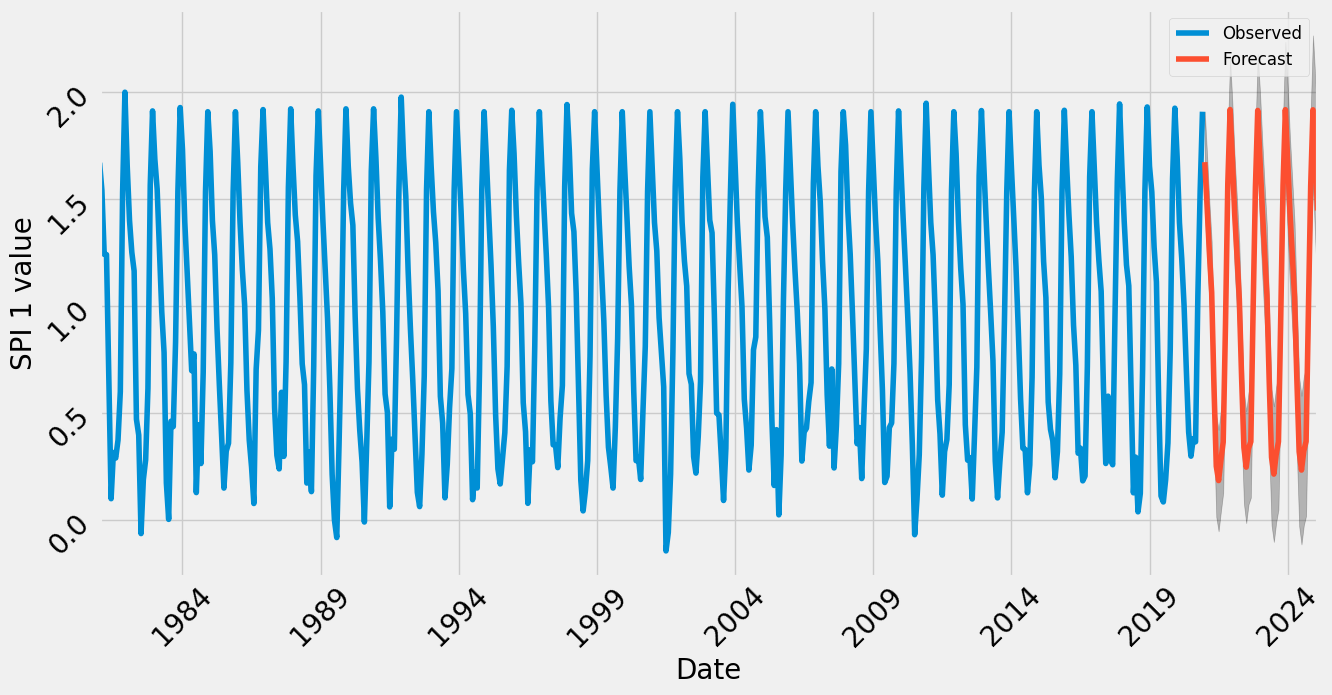

In [17]:
pred_uc = result.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()

plt.rcParams.update({'font.size': 12})

ax = y.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date',  fontsize=20)
ax.set_ylabel('SPI 1 value',  fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20, rotation=45)
ax.tick_params(axis='both', which='minor', labelsize=20, rotation=45)

plt.legend()
plt.show()

Text(0.5, 1.0, 'Original vs Windowed mean vs Windowed std')

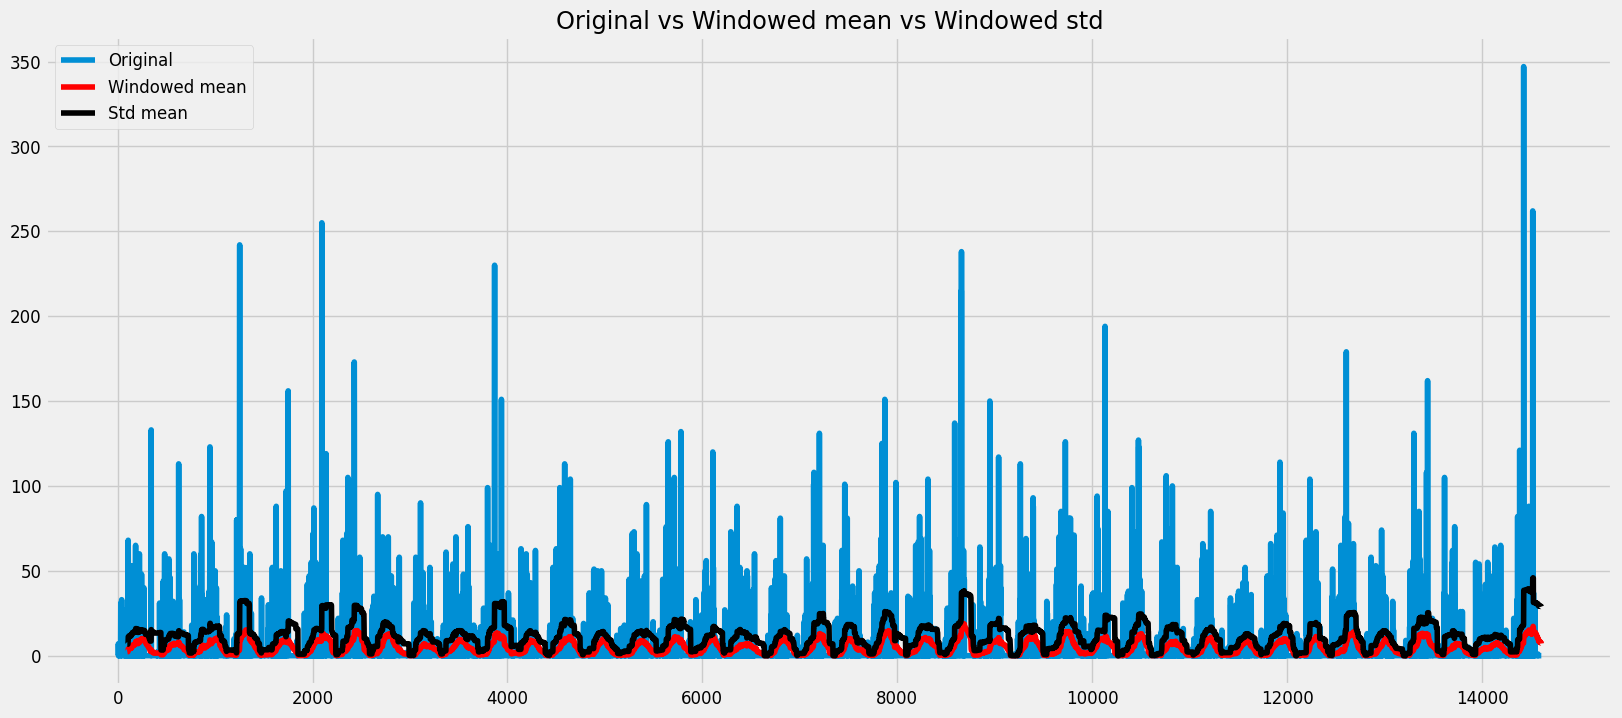

In [18]:
df_new = pd.read_excel("gdrive/My Drive/mL/jesonline.xlsx")
df_new.rainfall.plot(label='Original')
df_new.rainfall.rolling(window=100).mean().plot(
    color='red', label='Windowed mean')
df_new.rainfall.rolling(window=100).std().plot(
    color='black', label='Std mean')
plt.legend()
plt.title('Original vs Windowed mean vs Windowed std')

In [19]:
prediction = result.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower SPI1,upper SPI1
date,,
2017-01-01,1.422136,1.894271
2017-02-01,1.232562,1.704696
2017-03-01,0.974161,1.446293
2017-04-01,0.742770,1.214900
2017-05-01,0.403043,0.875172
2017-06-01,0.134800,0.606927
2017-07-01,0.107778,0.579905
2017-08-01,-0.023981,0.448144
2017-09-01,0.040103,0.512227


In [20]:
predicted_values = prediction.predicted_mean

# Confidence Intervals
prediction_ci['predicted_mean'] = predicted_values

# Save the prediction and confidence intervals to a DataFrame
forecast_df = prediction_ci[['predicted_mean', 'lower SPI1', 'upper SPI1']]

# Save the DataFrame to a CSV file
forecast_df.to_csv("gdrive/My Drive/mL/SPI1_forecast.csv")